In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns # for plotting

df = pd.read_csv('/Users/miaborko/Documents/epic3/Block3Epic/cleaned_data.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,68,White,Married,T1,N1,IIA,Poorly differentiated,NaN,Regional,4,Positive,Positive,24,1,60
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,NaN,Regional,35,Positive,Positive,14,5,62
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,NaN,Regional,63,Positive,Positive,14,7,75
3,58,White,Married,T1,N1,IIA,Poorly differentiated,NaN,Regional,18,Positive,Positive,2,1,84
4,47,White,Married,T2,N1,IIB,Poorly differentiated,NaN,Regional,41,Positive,Positive,3,1,50


In [52]:
#
df = pd.read_csv('/Users/miaborko/Documents/epic3/Block3Epic/cleaned_data.csv')

df.rename({'Tumor Size': 'Tumor Size (mm)', 'T Stage ': 'T Stage', 'Reginol Node Positive': 'Regional Node Positive', 'differentiate': 'Differentiate'}, axis=1, inplace=True)
df['Grade'] = df['Grade'].map({'1': 'Grade 1', '2': 'Grade 2', '3': 'Grade 3', ' anaplastic; Grade IV': 'Grade 4'})

df.to_csv('/Users/miaborko/Documents/epic3/Block3Epic/cleaned_data.csv', index=False)

In [53]:
#explanation:
#end nodes |-- and --| are min and max values, where the box starts is in between Q1 and Q3 (50% in the middle, 25% on each side ouside the box)
#line going through the box = mean

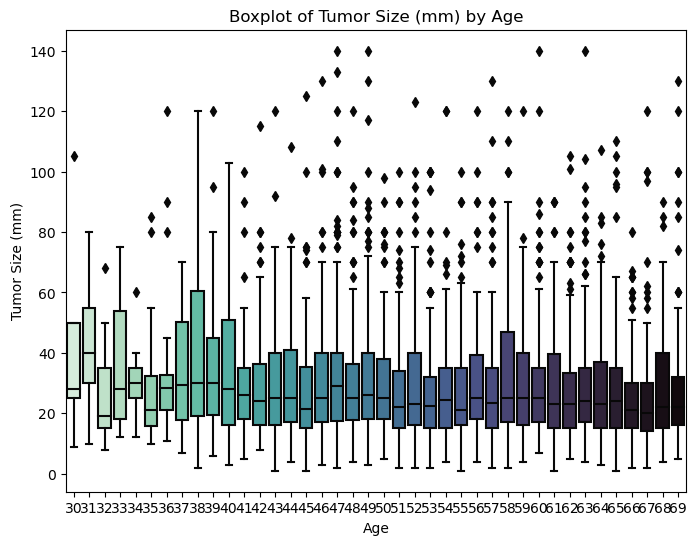

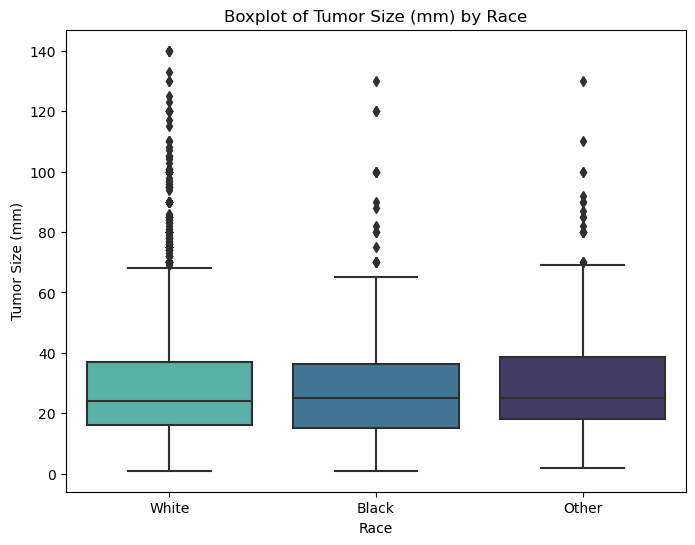

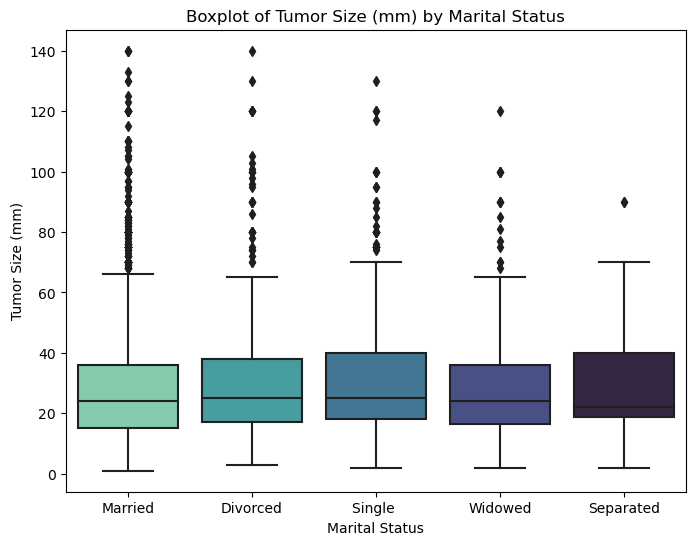

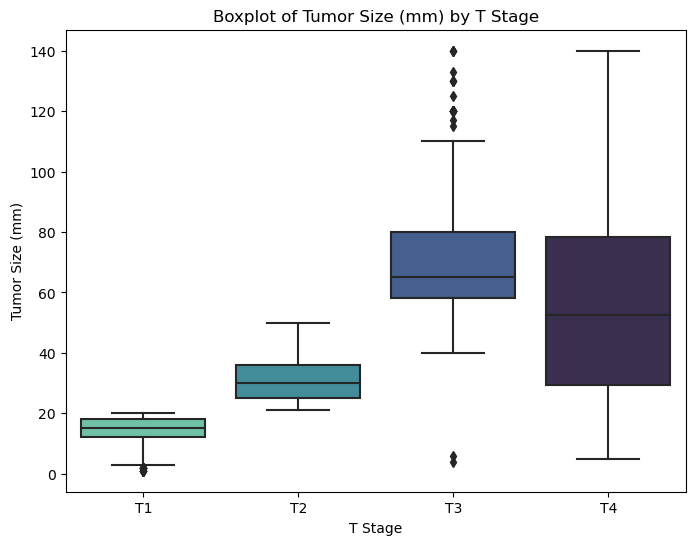

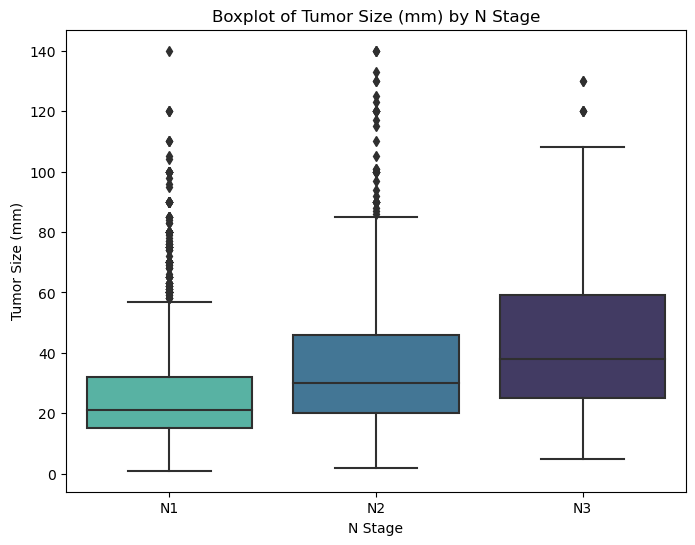

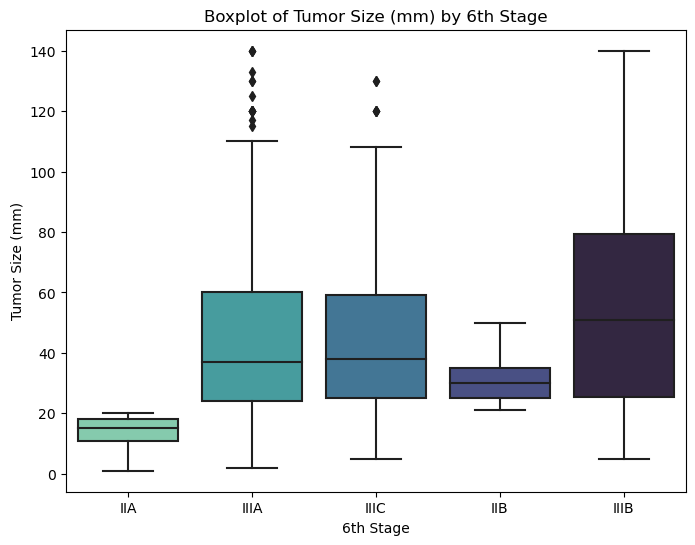

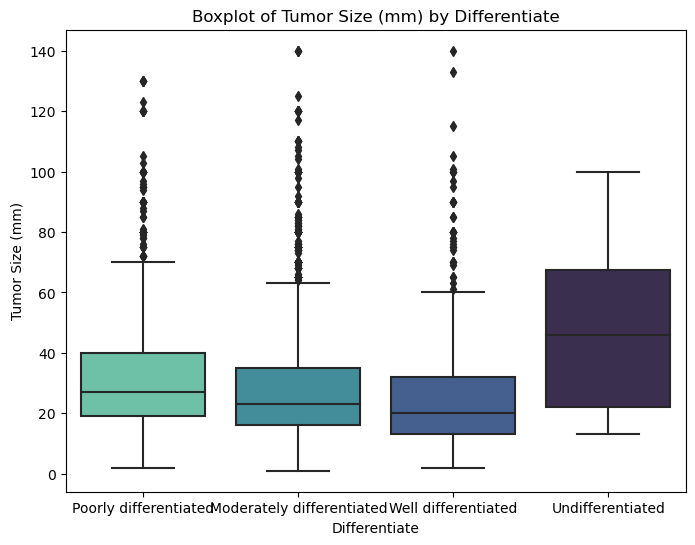

ValueError: min() arg is an empty sequence

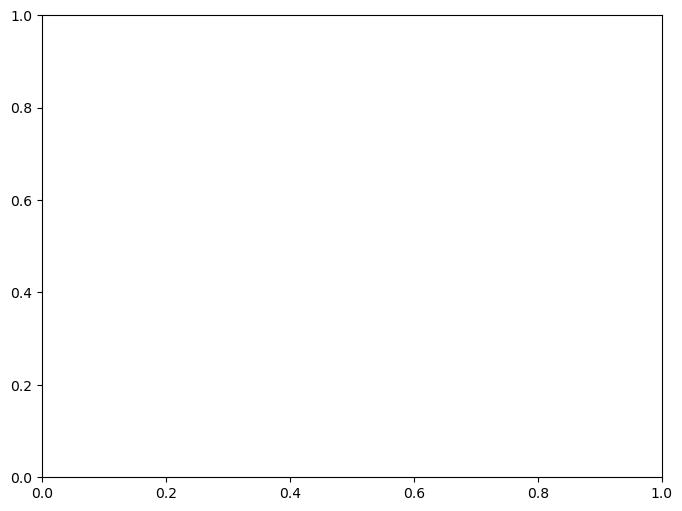

In [54]:
tum = "Tumor Size (mm)"
for col in df.columns:
    if col != tum:  
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.boxplot(data=df, x=col, y=df[tum], palette='mako_r')
        ax.set_title(f'Boxplot of {tum} by {col}')
        ax.set_xlabel(col)
        ax.set_ylabel(tum)
        plt.show()

In [55]:
df[tum]

0        4
1       35
2       63
3       18
4       41
        ..
3886     9
3887    46
3888    22
3889    44
3890    30
Name: Tumor Size (mm), Length: 3891, dtype: int64

In [ ]:

from collections import Counter
num_cols = 'Tumor Size (mm)'

threshold = 1.5


outlier_indices = []
for col in df.columns:
    is_outlier = (df[col] < (Q1[col] - threshold * IQR[col])) | (df[col] > (Q3[col] + threshold * IQR[col]))
    outlier_indices.extend(df.index[is_outlier])

for num_col in num_cols:
    for cat_col in cat_cols:
        unique_categories = df[cat_col].unique()
        for category in unique_categories:
            # Get the data subset for the current category
            data_subset = df[df[cat_col] == category][num_col]
            
            # Check if the data subset is not empty
            if not data_subset.empty:
                # Calculate quartiles and interquartile range
                Q1 = np.percentile(data_subset, 25, interpolation='midpoint')
                Q3 = np.percentile(data_subset, 75, interpolation='midpoint')
                IQR = Q3 - Q1

                upper_bound = Q3 + (1.5 * IQR)
                lower_bound = Q1 - (1.5 * IQR)

                upper_outliers = data_subset >= upper_bound
                lower_outliers = data_subset <= lower_bound

                outliers = data_subset[upper_outliers | lower_outliers].index

                outlier_index.extend(outliers)

outlier_index = Counter(outlier_index)

# Store only unique outlier indices
for key in outlier_index.keys():
    outlier_ind_list.append(key)

print(f'Number of outliers: {len(outlier_ind_list)}')


KeyError: 'T'

In [ ]:
#df_clean = df.drop(outlier_ind_list)

#depends on the model

In [ ]:
#dropping columns
#df.drop(columns=["Marital Status", "Differentiate"], inplace=True)
df.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Differentiate,Grade,A Stage,Tumor Size (mm),Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,68,White,Married,T1,N1,IIA,Poorly differentiated,NaN,Regional,4,Positive,Positive,24,1,60
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,NaN,Regional,35,Positive,Positive,14,5,62
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,NaN,Regional,63,Positive,Positive,14,7,75
3,58,White,Married,T1,N1,IIA,Poorly differentiated,NaN,Regional,18,Positive,Positive,2,1,84
4,47,White,Married,T2,N1,IIB,Poorly differentiated,NaN,Regional,41,Positive,Positive,3,1,50


In [ ]:
#to see correlation between data, jeans code btw
correlations = df.corr()
correlations

/var/folders/_c/s1yyycpn5s50m8qmlf_cz70h0000gn/T/ipykernel_20392/3724643784.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


,Age,Tumor Size (mm),Regional Node Examined,Regional Node Positive,Survival Months
Age,1.000000,-0.073608,-0.046628,-0.001016,-0.006364
Tumor Size (mm),-0.073608,1.000000,0.091660,0.283459,-0.076645
Regional Node Examined,-0.046628,0.091660,1.000000,0.298609,0.001278
Regional Node Positive,-0.001016,0.283459,0.298609,1.000000,-0.116978
Survival Months,-0.006364,-0.076645,0.001278,-0.116978,1.000000


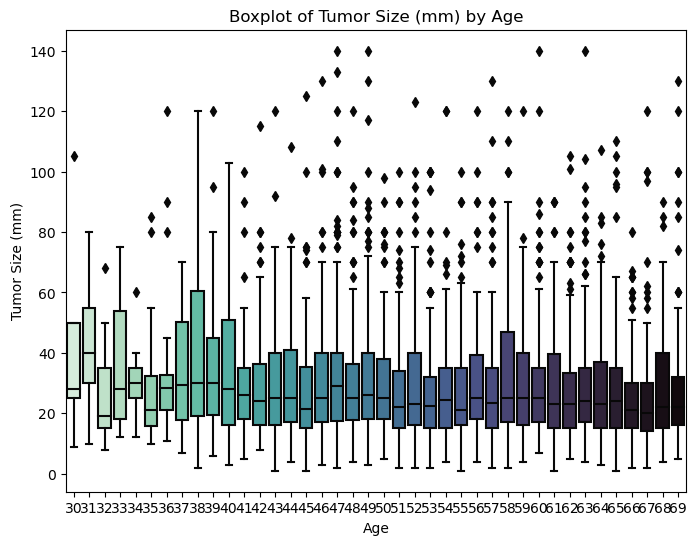

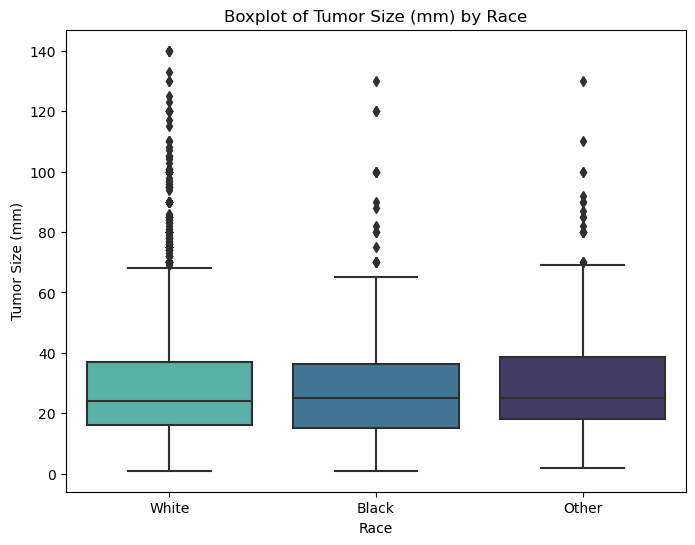

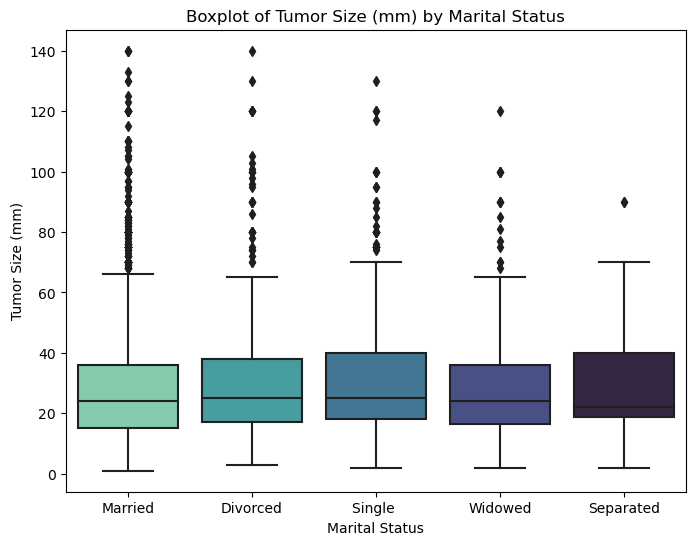

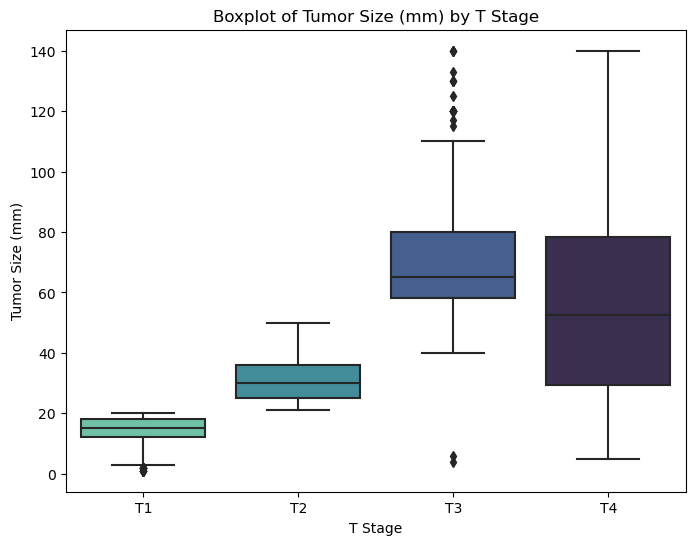

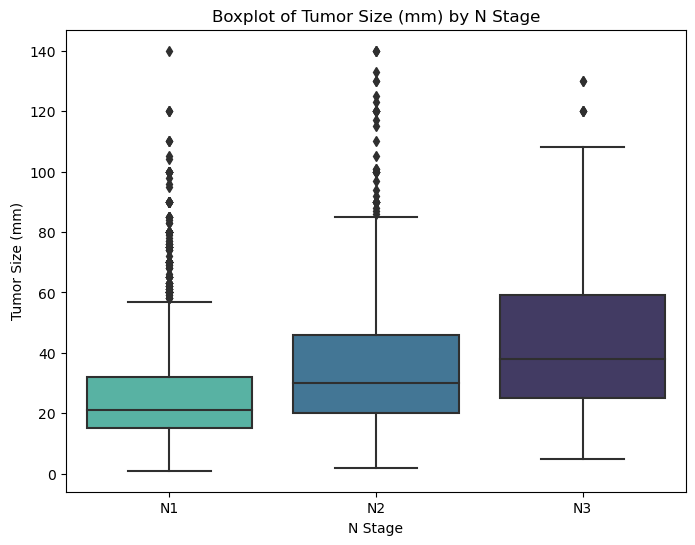

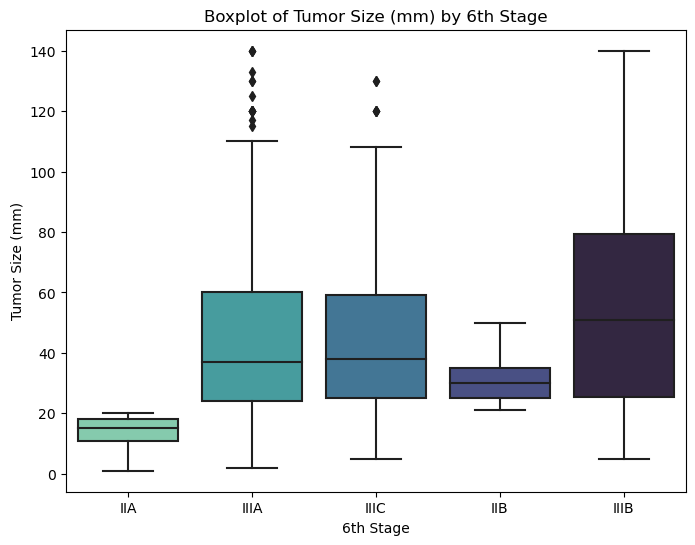

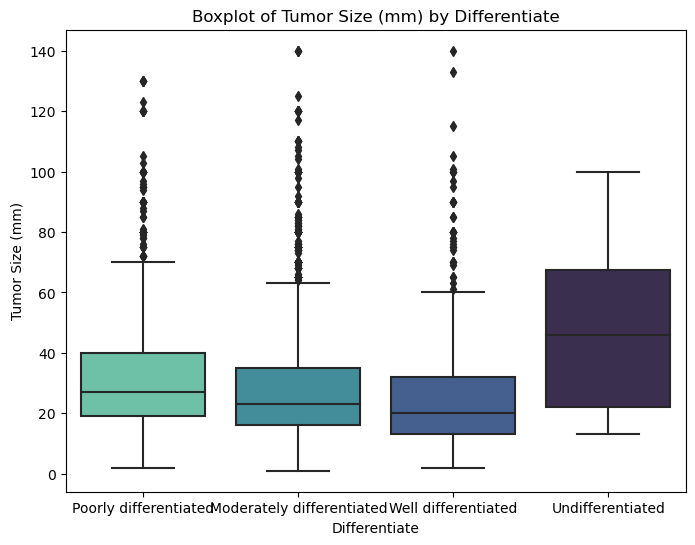

ValueError: min() arg is an empty sequence

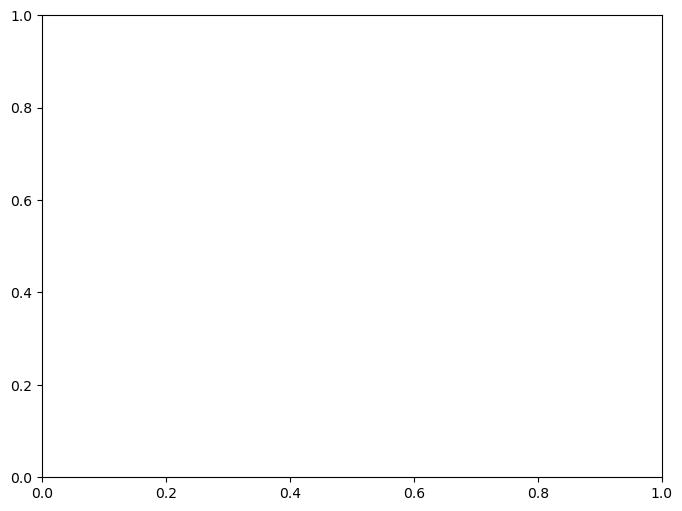

In [56]:
tumor_size_column = "Tumor Size (mm)"

for col in df.columns:
    if col != tumor_size_column:  
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.boxplot(data=df, x=col, y=df[tumor_size_column], palette='mako_r')
        ax.set_title(f'Boxplot of {tumor_size_column} by {col}')
        ax.set_xlabel(col)
        ax.set_ylabel(tumor_size_column)
        plt.show()